#**CIS 5450 Final Project - Predicting  100-Day Stock Returns**





Aeshon Balasubramanian, Carol Tu, Sonia Tam

# Part 1: Introduction

In financial analysis, the moving average (MA) is the average of the price taken over a specific period of time, for example 10 days, 20 days, or 300 days. Moving averages are used to smooth out price trends by filtering out random short term price fluctuations.

The general idea is that when price is above moving average, then the trend of price is moving up. When the price is below moving average, then the trend of price is moving down.

For our final project, we wanted to understand how moving averages can be used to gain insights into trading. More specifically, we wanted to understand this idea of price crossover further through data analysis and using modeling to prove or disprove this idea. We sought to do this by using different models to predict returns using price and moving averages, and then checking whether predicted returns matched with the future prices.

Dataset used: https://www.kaggle.com/datasets/nikhilkohli/us-stock-market-data-60-extracted-features

#Part 2: Data Loading and Preprocessing

First, we import all the necessary libraries, including pandas, matplotlib, numpy, sklearn, and seaborn. We also mount our Google Drive in this step.

In [ ]:
!pip install sqlalchemy==1.4.46

In [ ]:
!pip install pandasql
!pip install pandas==1.5.3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os
import pandasql as ps
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2.1 EDA

#2.1.1 Loading Data and Converting to Dataframe

We load our dataset into dataframes with this step. The standard naming convention for these dataframes will be "df_TICKERSYMBOL," for example, Apple's stock information will be loaded into "df_AAPL".

In [ ]:
df_AAPL = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AAPL.csv')

To get a better idea of what our data looks like, we print out Apple's stock in different formats and observe all the features.

In [ ]:
pd.set_option('display.max_columns', None)
df_AAPL.head()

,Date,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),S_Close(t-3),S_Close(t-5),S_Open(t-1),MA5,MA10,MA20,MA50,MA200,EMA10,EMA20,EMA50,EMA100,EMA200,MACD,MACD_EMA,ATR,ADX,CCI,ROC,RSI,William%R,SO%K,STD5,ForceIndex1,ForceIndex20,Date_col,Day,DayofWeek,DayofYear,Week,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Is_leap_year,Year,Month,QQQ_Close,QQQ(t-1),QQQ(t-2),QQQ(t-5),QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
0,2005-10-17,6.66,6.69,6.50,6.60,154208600,0.169237,6.827473,6.150527,6.67,6.63,6.08,6.22,6.67,6.470,6.444,6.4890,6.0978,5.14710,6.523675,6.523675,6.523675,6.523675,6.523675,0.108024,0.126360,0.226843,25.267370,1333.333333,-1.785714,56.769238,-25.000000,75.000000,0.050372,-10794602.0,15420860.0,2005-10-17,17,0,290,42,0,0,0,0,0,0,0,2005,10,33.65,33.55,33.30,33.61,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,6.45
1,2005-10-18,6.57,6.66,6.44,6.45,152397000,0.168339,6.819677,6.146323,6.60,6.67,6.63,6.37,6.66,6.486,6.425,6.4830,6.1214,5.15980,6.499117,6.499117,6.499117,6.499117,6.499117,0.098400,0.120768,0.226355,23.873006,1333.333333,-2.861446,52.468220,-41.304348,58.695652,0.052096,-22859550.0,-18287640.0,2005-10-18,18,1,291,42,0,0,0,0,0,0,0,2005,10,33.42,33.65,33.55,33.44,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,6.78
2,2005-10-19,6.43,6.78,6.32,6.78,252170800,0.180306,6.861112,6.139888,6.45,6.60,6.67,6.08,6.57,6.626,6.451,6.5005,6.1488,5.17395,6.592744,6.592744,6.592744,6.592744,6.592744,0.116064,0.119827,0.243043,22.578240,1333.333333,3.987730,59.701770,-5.434783,94.565217,0.047023,83216364.0,88259780.0,2005-10-19,19,2,292,42,0,0,0,0,0,0,0,2005,10,34.09,33.42,33.65,33.05,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,6.93
3,2005-10-20,6.72,6.97,6.71,6.93,339440500,0.202674,6.931847,6.121153,6.78,6.45,6.60,6.63,6.43,6.686,6.506,6.5265,6.1802,5.18870,6.705163,6.705163,6.705163,6.705163,6.705163,0.140547,0.123971,0.244255,22.190130,1333.333333,8.620690,62.495670,-3.773585,96.226415,0.028919,50916075.0,176509060.0,2005-10-20,20,3,293,42,0,0,0,0,0,0,0,2005,10,33.77,34.09,33.42,33.30,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,6.87
4,2005-10-21,7.02,7.03,6.83,6.87,199181500,0.216680,6.974860,6.108140,6.93,6.78,6.45,6.67,6.72,6.726,6.560,6.5415,6.2090,5.20315,6.760109,6.760109,6.760109,6.760109,6.760109,0.153340,0.129845,0.241094,22.063526,1333.333333,8.530806,60.683333,-14.285714,85.714286,0.030048,-11950890.0,59754450.0,2005-10-21,21,4,294,42,0,0,0,0,0,0,0,2005,10,33.98,33.77,34.09,33.55,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,7.01


#2.1.2 Cleaning Data + Dropping null values


First, we want to get rid of all the columns that we don't need. Since we are working with moving averages to understand price trends, we only need the 'MA', 'EMA', and 'QQQ_MA' columns.

In [ ]:
df_AAPL = df_AAPL[['Date', 'Open', 'High', 'Low', 'Close(t)', 'Volume', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200', 'EMA10', 'EMA20', 'EMA100', 'EMA200', 'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50']]
df_AAPL.dropna()
df_AAPL.head()

,Date,Open,High,Low,Close(t),Volume,MA5,MA10,MA20,MA50,MA200,EMA10,EMA20,EMA100,EMA200,QQQ_MA10,QQQ_MA20,QQQ_MA50
0,2005-10-17,6.66,6.69,6.50,6.60,154208600,6.470,6.444,6.4890,6.0978,5.14710,6.523675,6.523675,6.523675,6.523675,33.692,33.9970,34.2690
1,2005-10-18,6.57,6.66,6.44,6.45,152397000,6.486,6.425,6.4830,6.1214,5.15980,6.499117,6.499117,6.499117,6.499117,33.570,33.9525,34.2466
2,2005-10-19,6.43,6.78,6.32,6.78,252170800,6.626,6.451,6.5005,6.1488,5.17395,6.592744,6.592744,6.592744,6.592744,33.562,33.9600,34.2330
3,2005-10-20,6.72,6.97,6.71,6.93,339440500,6.686,6.506,6.5265,6.1802,5.18870,6.705163,6.705163,6.705163,6.705163,33.567,33.9455,34.2190
4,2005-10-21,7.02,7.03,6.83,6.87,199181500,6.726,6.560,6.5415,6.2090,5.20315,6.760109,6.760109,6.760109,6.760109,33.586,33.9365,34.2034


Since we have dates in this dataframe, we want to make sure that the dates are datetime objects in order for it to work for modeling down the line.

In [ ]:
df_AAPL['Date'] = pd.to_datetime(df_AAPL['Date'])
df_AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3732 non-null   datetime64[ns]
 1   Open      3732 non-null   float64       
 2   High      3732 non-null   float64       
 3   Low       3732 non-null   float64       
 4   Close(t)  3732 non-null   float64       
 5   Volume    3732 non-null   int64         
 6   MA5       3732 non-null   float64       
 7   MA10      3732 non-null   float64       
 8   MA20      3732 non-null   float64       
 9   MA50      3732 non-null   float64       
 10  MA200     3732 non-null   float64       
 11  EMA10     3732 non-null   float64       
 12  EMA20     3732 non-null   float64       
 13  EMA100    3732 non-null   float64       
 14  EMA200    3732 non-null   float64       
 15  QQQ_MA10  3732 non-null   float64       
 16  QQQ_MA20  3732 non-null   float64       
 17  QQQ_MA50  3732

<ipython-input-7-58fa88214fdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AAPL['Date'] = pd.to_datetime(df_AAPL['Date'])


#2.1.2 Removing Highly Correlated Variables

We want to make sure that we get remove highly correlated variables in order for it not to interfere with the modeling later. Since we're using Close(t) as our price of the stock, we want to make sure no variables are highly correlated with Close(t). We hypothesize that the High and Low columns are highly correlated, and we can graph a scatterplot to understand the correlation



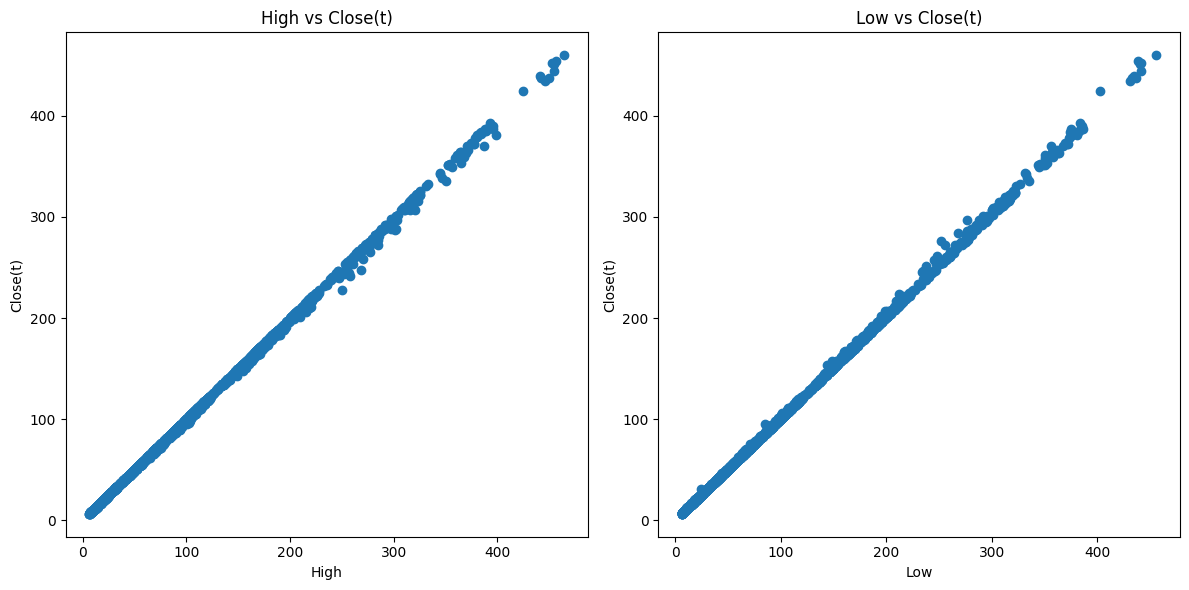

In [ ]:
# Select the columns of interest
columns_high_close = ["High", "Close(t)"]
columns_low_close = ["Low", "Close(t)"]

# Create a subset DataFrame with the selected columns
subset_high_close = df_AAPL[columns_high_close]
subset_low_close = df_AAPL[columns_low_close]

# Create the scatter plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subplot for High and Close(t)
plt.scatter(subset_high_close["High"], subset_high_close["Close(t)"])
plt.xlabel("High")
plt.ylabel("Close(t)")
plt.title("High vs Close(t)")

plt.subplot(1, 2, 2)  # Subplot for Low and Close(t)
plt.scatter(subset_low_close["Low"], subset_low_close["Close(t)"])
plt.xlabel("Low")
plt.ylabel("Close(t)")
plt.title("Low vs Close(t)")

plt.tight_layout()
plt.show()

As we can see, there is a high correlation between High vs Close(t), and Low vs Close(t). This may interfere with our modeling later due to multicollinearity, hence we will remove the columns High and Low.

In [ ]:
df_AAPL.drop(["High", "Low"], axis=1)

,Date,Open,Close(t),Volume,MA5,MA10,MA20,MA50,MA200,EMA10,EMA20,EMA100,EMA200,QQQ_MA10,QQQ_MA20,QQQ_MA50
0,2005-10-17,6.66,6.60,154208600,6.470,6.444,6.4890,6.0978,5.14710,6.523675,6.523675,6.523675,6.523675,33.692,33.9970,34.2690
1,2005-10-18,6.57,6.45,152397000,6.486,6.425,6.4830,6.1214,5.15980,6.499117,6.499117,6.499117,6.499117,33.570,33.9525,34.2466
2,2005-10-19,6.43,6.78,252170800,6.626,6.451,6.5005,6.1488,5.17395,6.592744,6.592744,6.592744,6.592744,33.562,33.9600,34.2330
3,2005-10-20,6.72,6.93,339440500,6.686,6.506,6.5265,6.1802,5.18870,6.705163,6.705163,6.705163,6.705163,33.567,33.9455,34.2190
4,2005-10-21,7.02,6.87,199181500,6.726,6.560,6.5415,6.2090,5.20315,6.760109,6.760109,6.760109,6.760109,33.586,33.9365,34.2034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727,2020-08-07,452.82,444.45,49453300,442.308,415.027,399.4075,370.3528,304.48200,438.152509,438.152509,438.152509,438.152509,266.054,263.4085,252.2098
3728,2020-08-10,450.40,450.91,53100900,445.496,422.262,402.8920,373.0236,305.53260,442.405006,442.405006,442.405006,442.405006,267.073,263.9970,252.9570
3729,2020-08-11,447.88,437.50,46975600,445.422,428.778,405.3905,375.3482,306.51415,440.770004,440.770004,440.770004,440.770004,267.911,264.2380,253.5878
3730,2020-08-12,441.99,452.04,41486200,447.938,436.034,408.4825,377.9338,307.55355,444.526669,444.526669,444.526669,444.526669,269.120,264.7860,254.3206


##2.1.3 Analyzing Price Trends using MA

One of the first ways to use MA is to analyze **price crossover**. This is when the price crosses above or below a moving average. First, let us visualize Apple's stock price over time.

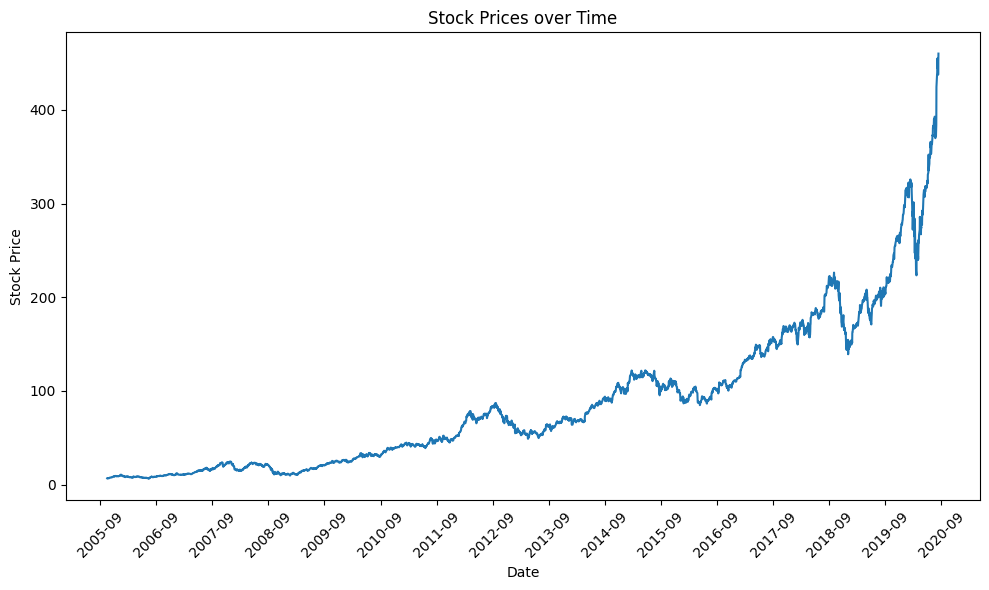

In [ ]:
# stock prices over time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))
plt.plot(df_AAPL['Date'], df_AAPL['Close(t)'])
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Prices over Time')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Takeaways:
- Apple's stock price has been on a long-term uptrend. The 200-day moving average has been rising steadily over the past 17 years, indicating that the overall trend is bullish.
- The stock price has been more volatile in recent years. The shorter-term moving averages (5-day, 10-day, 20-day, and 50-day) have been more choppy, indicating that there has been more short-term price action.

Next we want to plot the price against the different moving averages. This way, we can visualize when the price crosses over with the moving averages, and when the prices are above or below the moving averages.

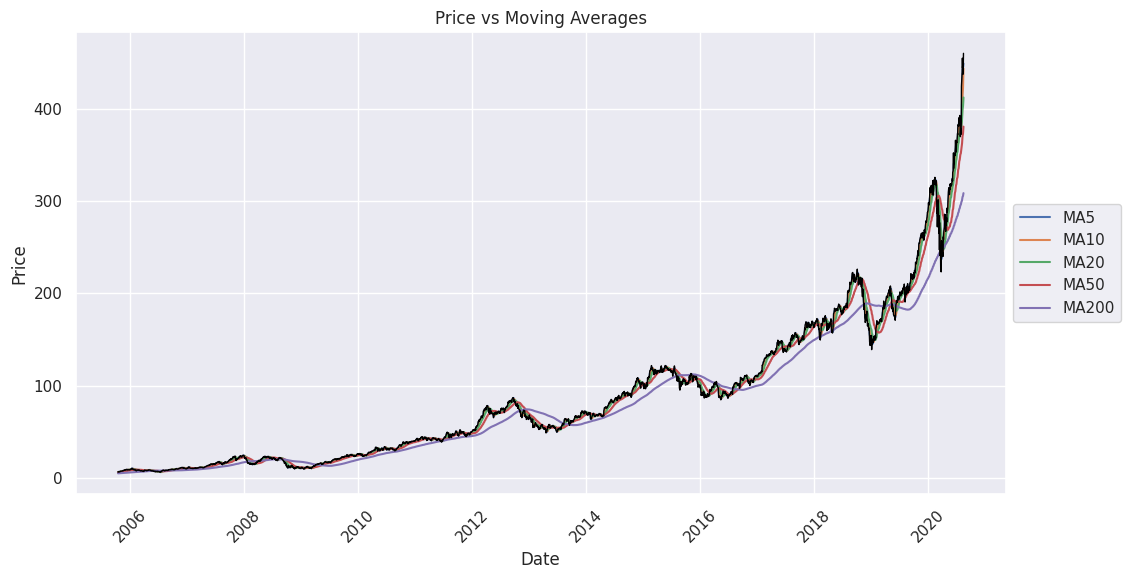

In [ ]:
moving_averages = ['MA5', 'MA10', 'MA20', 'MA50', 'MA200']
df_ma = df_AAPL[['Date', 'Close(t)'] + moving_averages].copy()
df_ma_melted = pd.melt(df_ma, id_vars=['Date', 'Close(t)'], value_vars=moving_averages,
                       var_name='Moving Average', value_name='Value')
sns.set(style='darkgrid')

plt.figure(figsize=(12, 6))

sns.lineplot(x='Date', y='Value', hue='Moving Average', data=df_ma_melted)
sns.lineplot(x='Date', y='Close(t)', color='black', linewidth=1, data=df_ma)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price vs Moving Averages')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)

plt.show()

Takeaways:
- The stock price is currently above all of its moving averages. This suggests that the stock is in a bullish trend.
- The stock price has crossed above the 200-day moving average several times in the past, and each time it has gone on to make new highs. This suggests that whenever the price is above the 200-day moving average, the trend of the price is upwards. When the price os below the 200-day moving average, it tends to trend down
- The 50-day moving average also follows the similar trend in that when the price is above the 50-day moving average, the trend of the price goes up. However, the 50-day moving average is more accurate to the price than the 200-day moving average, which is expected as the price averages are taken over a shorter period of time.
- The stock price is currently overbought. This suggests that the stock may be due for a pullback in the short term.

To focus more on when the prices cross over with the moving averages, we want to scope the data and limit our date range. We will choose data that goes from 2015 to 2020. We can do this with pandaSQL, and we first import the necessary libraries

In [ ]:
#Pandas version
df_AAPL_cleaned = df_AAPL[df_AAPL['Date'].dt.year >= 2015]
df_AAPL_cleaned.reset_index(inplace=True)
#SQL version
#query = """
#  SELECT *
#  FROM df_AAPL
#  WHERE Date >= '2015-01-01'
#"""

# Execute the query using the sqldf() function
#cleaned_AAPL_df = ps.sqldf(query, locals())

In [ ]:
df_AAPL_cleaned.head()


,index,Date,Open,High,Low,Close(t),Volume,MA5,MA10,MA20,MA50,MA200,EMA10,EMA20,EMA100,EMA200,QQQ_MA10,QQQ_MA20,QQQ_MA50
0,2318,2015-01-02,101.65,101.69,97.96,99.77,53204600,102.228,102.391,102.0555,101.7820,87.65590,101.417785,101.417785,101.417785,101.417785,99.033,98.4550,97.4782
1,2319,2015-01-05,98.82,99.15,96.19,96.96,64285500,100.816,101.807,101.6340,101.8498,87.80115,99.931857,99.931857,99.931857,99.931857,98.801,98.2860,97.5812
2,2320,2015-01-06,97.22,98.03,95.48,96.96,65797100,99.418,101.303,101.2350,101.8840,87.94375,98.941238,98.941238,98.941238,98.941238,98.397,98.0520,97.6308
3,2321,2015-01-07,97.82,98.73,97.37,98.32,40105900,98.546,100.829,101.0225,101.9384,88.08910,98.734158,98.734158,98.734158,98.734158,98.091,97.9150,97.6898
4,2322,2015-01-08,99.67,102.34,99.19,102.10,59364500,98.822,100.769,100.9205,102.0704,88.24960,99.856106,99.856106,99.856106,99.856106,98.004,97.8545,97.7844


Now we plot the same graph (Price vs Moving Averages) but only with data from 2015 onwards.

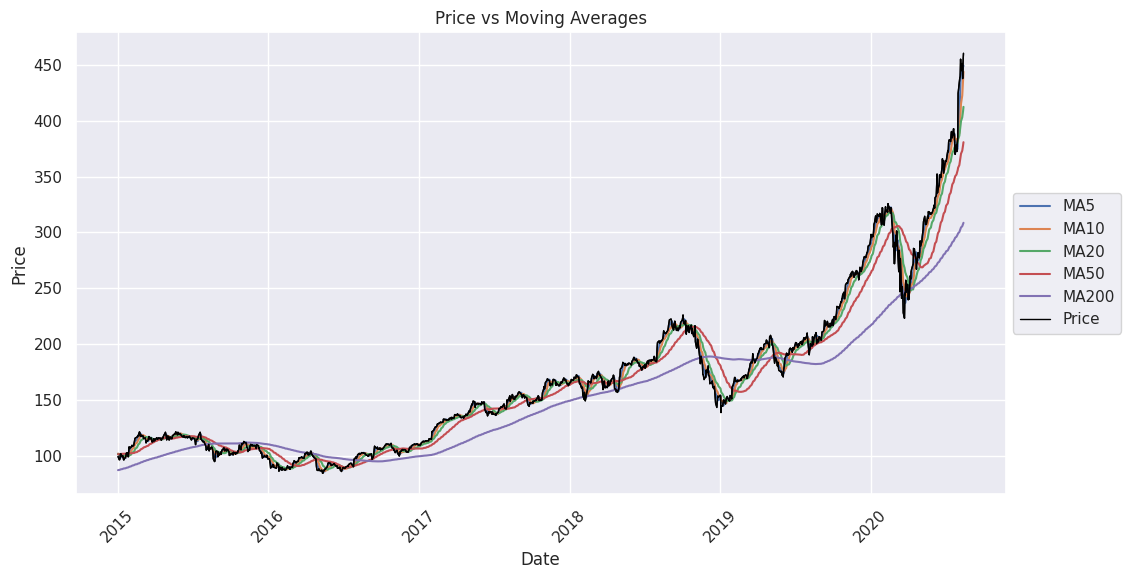

In [ ]:
df_ma_cleaned = df_AAPL_cleaned[['Date', 'Close(t)'] + moving_averages].copy()
df_ma_melted_cleaned = pd.melt(df_ma_cleaned, id_vars=['Date', 'Close(t)'], value_vars=moving_averages,
                       var_name='Moving Average', value_name='Value')

sns.set(style='darkgrid')
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Value', hue='Moving Average', data=df_ma_melted_cleaned)
sns.lineplot(x='Date', y='Close(t)', color='black', linewidth=1, data=df_ma_cleaned)
plt.plot('Date', 'Close(t)', color='black', linewidth=1, data=df_ma_cleaned, label='Price')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price vs Moving Averages')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


Takeaways
Moving averages can be used to identify the trend direction of a stock. When the stock price is above all of its moving averages, it is generally considered to be in an uptrend. When the stock price is below all of its moving averages, it is generally considered to be in a downtrend. This is indicated when the price is above the 50-day moving average near the end of 2018, and when it intersects with the 50-day moving average, the trend goes downward.

In general, the biggest takeaway is that when price crosses over with the moving averages, it indicates an inflection point for the moving average. This means that when analyzing the relationship between moving average and price, it is important to consider them side by side to find the intersections and observe when price is above or below the moving averages.

From analyzing this graph, we can make the following observation:

When price crosses over with moving averages, it tends to indicate a change in the moving average's slope. For example, when MA200 crosses over with price between 2015 and 2016, MA200 is seen to stop inclining andstart declining. Another example is around 2019, when price is above MA50 the trend is going up. However, as soon as price crosses over with MA50, the trend goes significantly downwards.

This demonstrates our hypothesis that when price is **above** the moving average, then the trend of the price is moving **up**.

This means that if a trader suddenly sees prices increase above moving average, then it may indicate a trend of the stock going up.

#2.1.4 Analyzing Price Trends using EMA

Now we want to do the same price trend analysis using EMA, so that we can compare

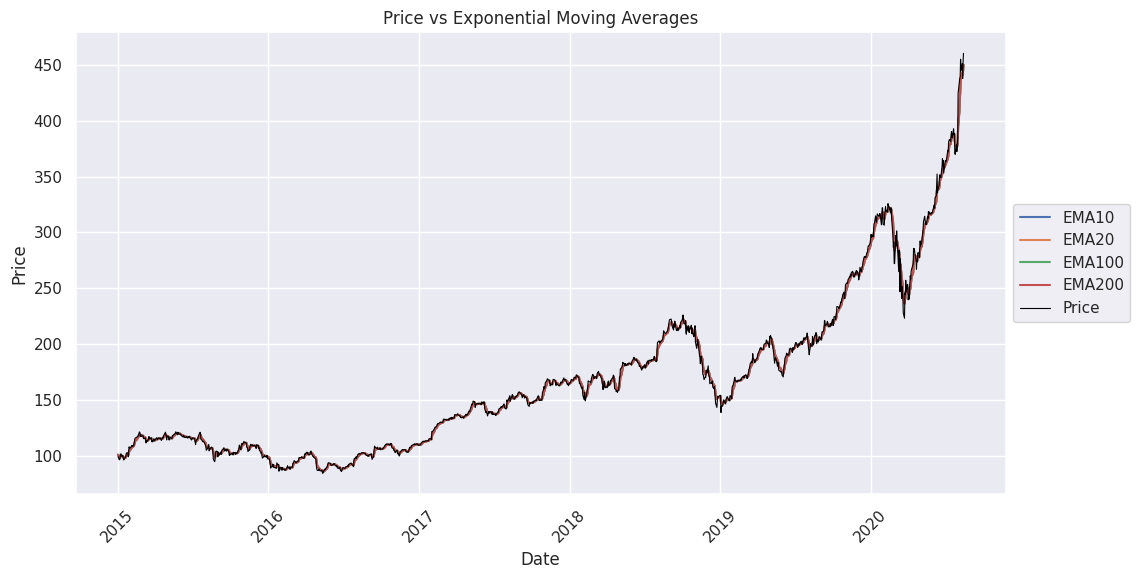

In [ ]:
exponential_moving_averages = ['EMA10', 'EMA20', 'EMA100', 'EMA200']
df_ema = df_AAPL_cleaned[['Date', 'Close(t)'] + exponential_moving_averages].copy()
df_ema_melted = pd.melt(df_ema, id_vars=['Date', 'Close(t)'], value_vars=exponential_moving_averages,
                       var_name='Exponential Moving Average', value_name='Value')

sns.set(style='darkgrid')

plt.figure(figsize=(12, 6))

# Plot the lines
for ema in exponential_moving_averages:
    sns.lineplot(x='Date', y='Value', data=df_ema_melted[df_ema_melted['Exponential Moving Average'] == ema], label=ema)

plt.plot('Date', 'Close(t)', color='black', linewidth=0.8, data=df_ema, label='Price')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price vs Exponential Moving Averages')

# Add legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)

plt.show()

Takeaways:
- EMAs are more responsive to recent price changes than simple moving averages (SMAs). This is because EMAs give more weight to the most recent data points. As a result, EMAs can be more helpful for identifying short-term trends and reversals. From this, we see that all the EMAs are highly accurate to the price of the stock, which is expected since EMA exponentially favors the more recent price data. This means that when analyzing the relationship between EMA and price, we want to use EMA to represent and predict price, as opposed to trying to find the intersections between EMA and price or when one is higher than the other.
- The stock price has stayed above its 20-day and 50-day EMAs for most of the past year. This suggests that the stock has been in a bullish trend during this period.
- The stock price recently crossed above its 200-day EMA. This is a potential buy signal for some traders, as it suggests that the stock is breaking out to a new high.


As observed here, any of the EMAs provide a very accurate estimate of the price. This means that

#2.1.5 Percent Change in Prices per day

To better understand volatility, we want to measure the percent change of price in a given day. This can be calculated by Closing price - Opening price, divided by the Opening price.

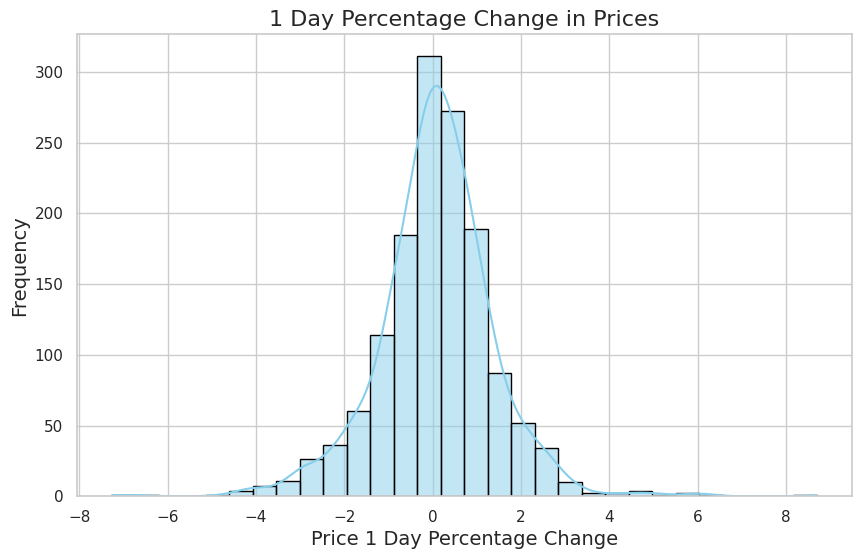

In [ ]:
# Assuming 'Close(t)' is the column containing the closing prices
percent_change = (df_AAPL_cleaned['Close(t)'] - df_AAPL_cleaned['Open']) / df_AAPL_cleaned['Open'] * 100

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(percent_change, bins=30, kde=True, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('1 Day Percentage Change in Prices', fontsize=16)
plt.xlabel('Price 1 Day Percentage Change', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


Takeaways:
- The majority of days (around 60%), the stock price changes by less than 1%.
- Since the distribution is slightly leaning to the right, this means the stock price is more likely to go up than down on any given day, but the difference is small (around 52% of days are up days and 48% of days are down days).
- The stock price is more likely to experience large price swings (greater than 5%) on days when the market is volatile, as seen by the right skew. This could be attributed to the volatile markets during 2019 and 2020 during the COVID pandemic.
- The graph is symmetrical, meaning that the frequency of price increases is roughly equal to the frequency of price decreases.

Overall, this is a relatively normal distribution.

#2.1.6 Volume vs Percent Change in Price

To better understand when the stock is most traded, we want to explore the relationship between volume of stock traded and the percent change of the price in a given day.

<ipython-input-17-ffd26c973bcf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AAPL_cleaned['Percent Change'] = percent_change


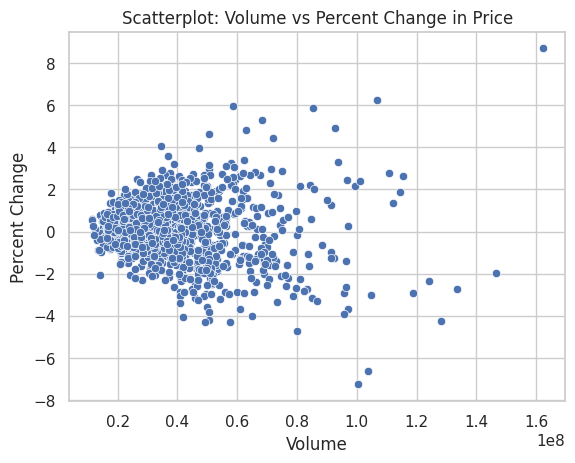

In [ ]:
df_AAPL_cleaned['Percent Change'] = percent_change

# Create the scatterplot
plt.title('Scatterplot: Volume vs Percent Change in Price')
sns.scatterplot(data=df_AAPL_cleaned, x='Volume', y='Percent Change')

# Display the plot
plt.show()

Takeaways
- Most of the data is on the left, where there is low percent change in the price in a given day, and when there is low volume of stock traded. This means that more frequently than not, the Apple stock is traded at small volumes when there is not that much price fluctuation
- As the volume increases there is more noticeably sparser data and more higher/lower percent changes. This indicates that when there is a significant change in price in the stock on a given day, there is a lot of people trading the Apple stock. This could be indicative of large events such as when Apple releases their new iPhone or uncovers new technology, some people may be very bullish on the technology and hence a lot of people trade the stock, which also drives the price upwards.

#2.1.7 Setting up features for modeling

To prepare for our models, where we want to compare the prices in the future with the predicted prices to judge the accuracy of the model, we want to create a feature of the future prices.

In [ ]:
df_Stock = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AAPL.csv')

First, we drop the columns that aren't relevant to our goal and interfere with our data processing since they aren't a numerical type.



In [ ]:
df_Stock = df_Stock.drop(columns=['Date_col', 'Date'])

 Now, we create new columns for the return of the stock 50, 100, and 200 days from the current date. For Return_50, we do this with the following formula:

  (open price 50 days from now/ current open price) -1

This will give us the percentage gained in 50 days. Now, we repeat this for 100 days, and then 200 days, in columns Return_100 and Return_200 respectively. If the number of days in the future doesn't exist, then we set the value in that column to be null.


In [ ]:
query = """
SELECT *,
    ((LEAD("Open", 50) OVER (ORDER BY "Date")) / "Open") - 1 AS Return_50,
    ((LEAD("Open", 100) OVER (ORDER BY "Date")) / "Open") - 1 AS Return_100,
    ((LEAD("Open", 200) OVER (ORDER BY "Date")) / "Open") - 1 AS Return_200
FROM
    df_Stock
"""

# Execute the query
df_Stock = ps.sqldf(query, locals())
df_Stock

,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),S_Close(t-3),S_Close(t-5),S_Open(t-1),MA5,MA10,MA20,MA50,MA200,EMA10,EMA20,EMA50,EMA100,EMA200,MACD,MACD_EMA,ATR,ADX,CCI,ROC,RSI,William%R,SO%K,STD5,ForceIndex1,ForceIndex20,Day,DayofWeek,DayofYear,Week,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Is_leap_year,Year,Month,QQQ_Close,QQQ(t-1),QQQ(t-2),QQQ(t-5),QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast,Return_50,Return_100,Return_200
0,6.66,6.69,6.50,6.60,154208600,0.169237,6.827473,6.150527,6.67,6.63,6.08,6.22,6.67,6.470,6.444,6.4890,6.0978,5.14710,6.523675,6.523675,6.523675,6.523675,6.523675,0.108024,0.126360,0.226843,25.267370,1333.333333,-1.785714,56.769238,-25.000000,75.000000,0.050372,-1.079460e+07,1.542086e+07,17,0,290,42,0,0,0,0,0,0,0,2005,10,33.65,33.55,33.30,33.61,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,6.45,0.379880,0.205706,0.258258
1,6.57,6.66,6.44,6.45,152397000,0.168339,6.819677,6.146323,6.60,6.67,6.63,6.37,6.66,6.486,6.425,6.4830,6.1214,5.15980,6.499117,6.499117,6.499117,6.499117,6.499117,0.098400,0.120768,0.226355,23.873006,1333.333333,-2.861446,52.468220,-41.304348,58.695652,0.052096,-2.285955e+07,-1.828764e+07,18,1,291,42,0,0,0,0,0,0,0,2005,10,33.42,33.65,33.55,33.44,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,6.78,0.386606,0.235921,0.260274
2,6.43,6.78,6.32,6.78,252170800,0.180306,6.861112,6.139888,6.45,6.60,6.67,6.08,6.57,6.626,6.451,6.5005,6.1488,5.17395,6.592744,6.592744,6.592744,6.592744,6.592744,0.116064,0.119827,0.243043,22.578240,1333.333333,3.987730,59.701770,-5.434783,94.565217,0.047023,8.321636e+07,8.825978e+07,19,2,292,42,0,0,0,0,0,0,0,2005,10,34.09,33.42,33.65,33.05,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,6.93,0.360809,0.300156,0.300156
3,6.72,6.97,6.71,6.93,339440500,0.202674,6.931847,6.121153,6.78,6.45,6.60,6.63,6.43,6.686,6.506,6.5265,6.1802,5.18870,6.705163,6.705163,6.705163,6.705163,6.705163,0.140547,0.123971,0.244255,22.190130,1333.333333,8.620690,62.495670,-3.773585,96.226415,0.028919,5.091607e+07,1.765091e+08,20,3,293,42,0,0,0,0,0,0,0,2005,10,33.77,34.09,33.42,33.30,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,6.87,0.330357,0.227679,0.232143
4,7.02,7.03,6.83,6.87,199181500,0.216680,6.974860,6.108140,6.93,6.78,6.45,6.67,6.72,6.726,6.560,6.5415,6.2090,5.20315,6.760109,6.760109,6.760109,6.760109,6.760109,0.153340,0.129845,0.241094,22.063526,1333.333333,8.530806,60.683333,-14.285714,85.714286,0.030048,-1.195089e+07,5.975445e+07,21,4,294,42,0,0,0,0,0,0,0,2005,10,33.98,33.77,34.09,33.55,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,7.01,0.320513,0.138177,0.150997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727,452.82,454.70,441.17,444.45,49453300,27.954399,455.316298,343.498702,454.79,439.46,437.87,424.28,440.83,442.308,415.027,399.4075,370.3528,304.48200,438.152509,438.152509,438.152509,438.152509,438.152509,20.908358,15.211138,12.474742,41.364079,1333.333333,20.189837,73.038930,-12.270790,87.729210,0.022205,-5.113471e+08,3.039400e+09,7,4,220,32,0,0,0,0,0,0,1,2020,8,271.47,274.64,271.05,265.79,266.054,263.4085,252.2098,3351.28,3349.16,3271.12,27433.48,27386.98,26428.32,450.91,NaN,NaN,NaN
3728,450.40,455.10,440.00,450.91,53100900,29.847338,462.586675,343.197325,444.45,454.79,439.46,434.97,452.82,445.496,422.262,402.8920,373.0236,305.53260,442.405006,442.405006,442.405006,442.405006,442.405006,21.936462,16.556202,12.662261,42.739093,1333.333333,19.111898,74.615945,-5.867777,94.132223,0.020792,3.430318e+08,3.700602e+09,10,0,223,33,0,0,0,0,0,0,1,2020,8,270.31,271.47,274.64,269.38,267.073,263.9970,252

Now we want to calculate the features of (Moving Averages - Price) for each of the moving averages. We do this because we hypothesized that the difference between price and moving average will allow us to predict return. This will lead to better data for our model to train on, versus just training our model on the moving average.

In [ ]:
for i in df_Stock.columns:
 if 'MA' in i:
   df_Stock[i] = df_Stock[i] - df_Stock['Open']

Since we will have at most 200 nulls in our dataframe, we drop all null values to allow for easier and more practical preprocessing because it is a negligble amount given the size of our dataset.

In [ ]:
df_Stock = df_Stock.dropna()

#PART 3: Baseline Modeling - Linear Regression

#3.1 Test train set

We prepare our data to be inputted into our regression models. First, we set our target variable to be Return_100, indicating that we want to predict the return in 100 days. We picked Return_100 because it returned the highest accuracy after testing many iterations of the regression models.

We split our dataset 80% training and 20% testing data.

In [ ]:
from sklearn.model_selection import train_test_split

dfFeatures = df_Stock.drop('Return_100', axis=1)
dfTarget = df_Stock['Return_100']

X_train, X_test, y_train, y_test = train_test_split(dfFeatures, dfTarget, test_size=0.2, random_state=42)

#3.2 Linear Regression

First, we perform linear regression. This model assumes a linear relationship between our features and our target variable, Return_100. Using linear regression is appropriate here because we are investigating a potential linear relationship between past prices.

We end up with an R^2 value of 0.711, meaning that approximately 71.1% of the variability in the stock returns can be explained by the model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))

0.7111139135850322


We also graph our data to better visualize our results. The plot shows a positive linear relationship between the actual and predicted values, indicated by the clustering of points along a line. While there is some deviation, especially for higher values, the general trend suggests that the linear model captures the direction of stock returns effectively.

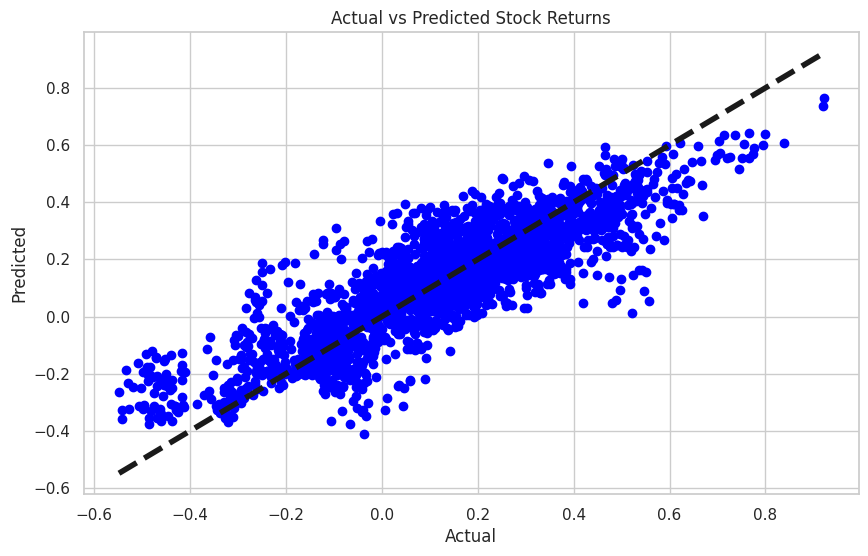

In [ ]:
y_train_pred = lr.predict(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Stock Returns')
plt.show()

#3.3 Lasso Regression

Now, we perform Lasso Regression. We first standardizes our features by removing the mean and scaling to unit variance, which is a crucial step since it is sensitive to the scale of input features.



In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now, we perform regression with an alpha value of 0.1, which will set some feature weights to zero, effectively performing feature selection and resulting in a simpler, more interpretable model.

We achieved an R^2 score of 0.381, which indicates that approximately 38.16% of the variability in the stock returns can be explained by the model. This is significantly lower that the R^2 of the linear regression model.

The drop in R^2 from the training set (linear regression) to the test set (Lasso regression) suggests that the model may not generalize well to unseen data, or that the linear regression model was overfitting the training data and the Lasso regression provides a more realistic estimate of predictive performance.

In [ ]:
from sklearn.linear_model import Lasso

reg_lasso = Lasso(alpha = 0.1)
reg_lasso.fit(X_train_scaled, y_train)

y_pred_lasso = reg_lasso.predict(X_test_scaled)

lasso_score = reg_lasso.score(X_test_scaled, y_test)

lasso_score


0.3816200212186195

Now, we plot the Lasso plot. Just like in the linear regression plot, there is a clustering of data points, which suggests a positive linear relationship between the actual and predicted stock returns. The data points deviate from the identity line to some extent, indicating prediction errors, but there is a visible correlation between the predicted and actual values.

We can observe that the data points tend to form a dense cluster around the center of the plot, which may imply that the model is more effective at predicting returns that are closer to the average, while the accuracy decreases for returns that are far from the average. This pattern is typical in regression models, where extreme values are often harder to predict accurately.

Overall, the general trend in the plot does indicate that the Lasso regression model is capturing the directionality of stock returns, albeit with a lower degree of accuracy compared to the linear regression model as reflected by the lower R^2 score.


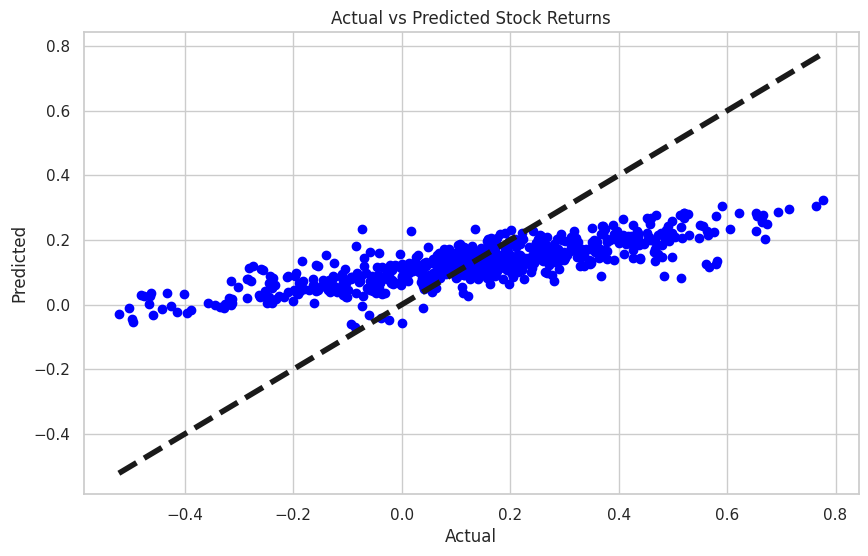

In [ ]:
y_pred_lasso = reg_lasso.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Stock Returns')
plt.show()

#3.4 Ridge Regression

We perform Ridge Regression, which penalizes the square of the coefficients, which can lead to a model where the weight of less important features is reduced but not set to zero, unlike Lasso regression.

We obtain an R^2 score of 0.707. This score is much closer to the one obtained with linear regression, indicating that approximately 70.7% of the variability in the stock returns can be explained by the model. This suggests that Ridge regression, with the given alpha, provides a balance between bias and variance, potentially handling any overfitting that might be occurring in the linear regression model. By imposing a penalty on the size of coefficients, Ridge regression can reduce model complexity and prevent overfitting, which often results in a model that performs better on unseen data.

In [ ]:
from sklearn.linear_model import Ridge
reg_ridge = Ridge(alpha=0.1)
reg_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = reg_ridge.predict(X_test_scaled)
ridge_score = reg_ridge.score(X_test_scaled, y_test)
print(ridge_score)

0.707033080867308


The Ridge regression plot is similar to that of the linear regression, with most points clustering around the identity line and only a few deviating significantly, it indicates that Ridge regression has managed to capture the linear relationship between the features and the target variable effectively.

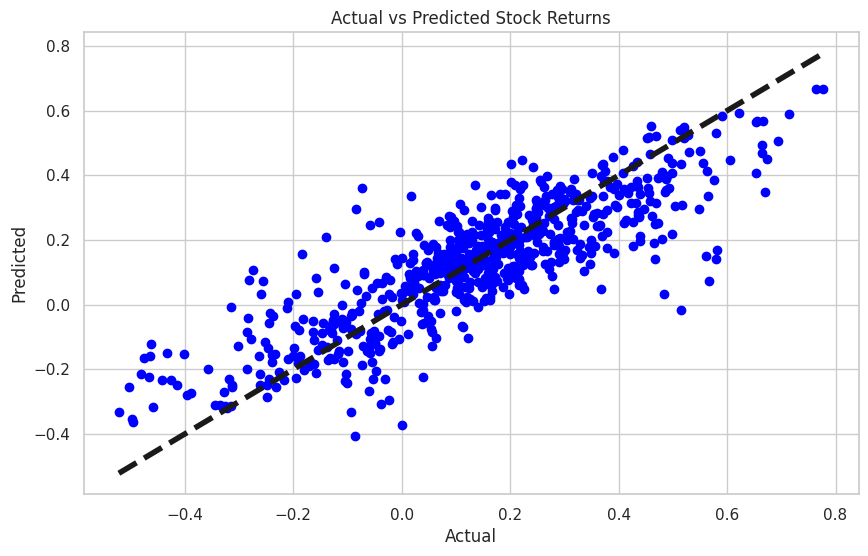

In [ ]:
y_pred_ridge = reg_ridge.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Stock Returns')
plt.show()

#3.5 Elastic Net Regression

Finally, we perform Elastic Net Regression, which combines the properties of both Lasso and Ridge regression: it can shrink less important feature coefficients to zero (like Lasso) and also distribute the weight among the features more evenly (like Ridge).

The R^2 value of 0.653 means that the Elastic Net model explains approximately 65.34% of the variability in stock returns, which is between the performance of the Lasso and Ridge models we evaluated previously.

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.1)
elastic_net.fit(X_train_scaled, y_train)
y_pred_elastic_net = elastic_net.predict(X_test_scaled)
elastic_net_score = elastic_net.score(X_test_scaled, y_test)
print(elastic_net_score)

0.6534523952658964


Our plot clusters more tightly around the identity line than the Lasso plot, suggesting that the Elastic Net model has improved preidctive accuracy over Lasso, but may not be as accurate as the Ridge model because of the lower R^2 score.

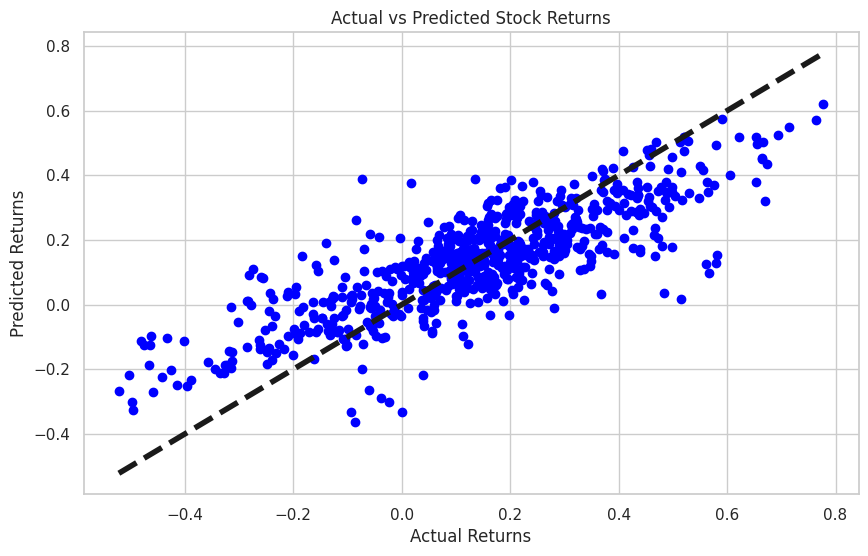

In [ ]:
y_pred_elastic_net = elastic_net.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_elastic_net, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Returns')
plt.ylabel('Predicted Returns')
plt.title('Actual vs Predicted Stock Returns')
plt.show()

##Part 4: Modeling - Random Forest Regression

Now that we have a baseline model with over 70% accuracy, we can experiment with a more complex model to improve accuracy. We will look next at Random Forest Regression, which is generally better at handling outliers and is more accurate than linear regression, and more interpretable than neural networks. It functions by running multiple decision tree models at the same time, thus increasing accuracy.

First, let's now split our data into training and testing sets. First we drop any remaining null values, though there likely aren't any. Then we drop our target variables and pass the resulting df to X, and keep Return_100 as our chosen target variable. After experimenting with 50 and 200 day returns, we found that 100 day returns can be most accurately predicted by this model.

In [ ]:
df_Stock.dropna(inplace=True)

X = df_Stock.drop(['Return_50', 'Return_100', 'Return_200'], axis=1)
y = df_Stock['Return_100']

train_size = int(0.85 * y.shape[0])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, shuffle=True, random_state=42)

<ipython-input-33-82b61ed91850>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Stock.dropna(inplace=True)


Now, we need to conduct hyperparameter tuning. We can use a parameter grid for this. We will define all of our feature lists first. However, we don't have the time to try fitting the data with all possible combinations, so we will use a randomized search to pick the top 20 results and find the highest performing set of hyperparameters.

In [ ]:
grid = {'n_estimators': [200, 500, 1000], 'max_depth': [5, 20, 50], 'max_features': ['sqrt'], 'bootstrap':[True, False]}
test_scores = []

rf_model = RandomForestRegressor()

for g in ParameterGrid(grid):
    rf_model.set_params(**g)
    rf_model.fit(X_train, y_train)
    test_scores.append(rf_model.score(X_test, y_test))
    print(g)

best_index = np.argmax(test_scores)
print(test_scores[best_index], ParameterGrid(grid)[best_index])

{'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}
{'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}
{'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 1000}
{'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}
{'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 500}
{'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 1000}
{'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 200}
{'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 500}
{'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 1000}
{'bootstrap': False, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}
{'bootstrap': False, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}
{'bootstrap': False, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 1000}
{'bootstrap': F

We have now fitted our model with the best parameters. Now, let's look at our accuracy and error and view a plot of testing results.

Mean Squared Error: 0.0011808753149617217
R-squared: 0.9782238744263688


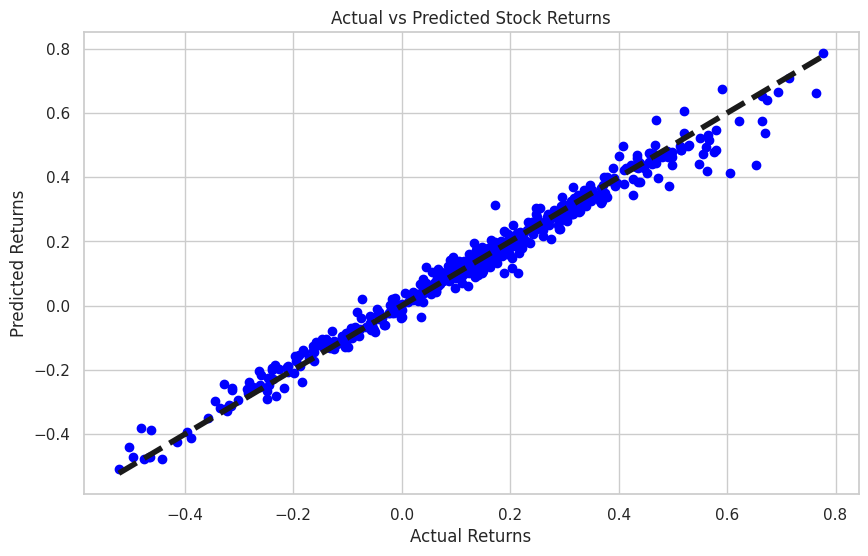

In [ ]:
y_pred = rf_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Returns')
plt.ylabel('Predicted Returns')
plt.title('Actual vs Predicted Stock Returns')
plt.show()

The 97.8% accuracy we achieved by running Random Forest Regression is significantly higher than the accuracy we had for Linear Regression. As a result we now have a model that can predict 100 day stock returns with high accuracy.